In [1]:
import datetime
import matplotlib.pyplot as plt 
import pylab
import yfinance as yf
yf.pdr_override()
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr 
plt.style.use('ggplot')
import sys
import warnings
import seaborn as sns
%matplotlib inline 

if not sys.warnoptions:
    warnings.simplefilter("ignore")



In [2]:
df = pdr.get_data_yahoo('SPY',start = '2017-01-01', end = '2018-01-01')
df = df["Close"]
df = pd.DataFrame(df)

df1 = df['Close']
df1 = pd.DataFrame(df1)

[*********************100%***********************]  1 of 1 completed


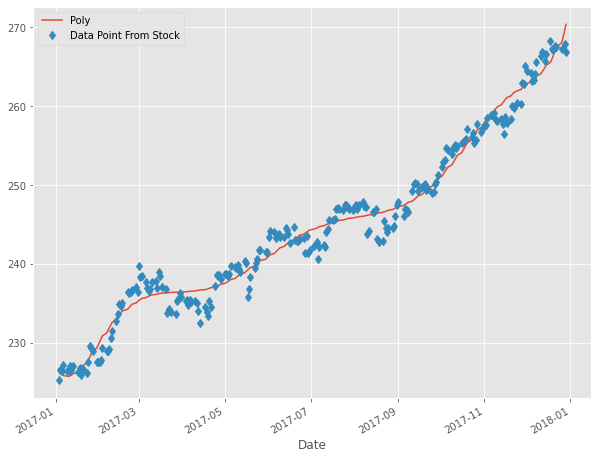

In [3]:
reg = np.polyfit(np.arange(len(df)),df['Close'].values,deg=8)
Quad = np.polyval(reg,np.arange(len(df)))
df['Poly'] = Quad

df['Poly'].plot(figsize = (10,8))
pylab.plot(df['Close'],'d',label = 'Data Point From Stock')
pylab.legend()
plt.show()


## Interpolation

In [4]:
x = np.arange(len(df))
y = np.array(df['Close'].tolist())
y1 = interp1d(x,y,kind = 'quadratic')

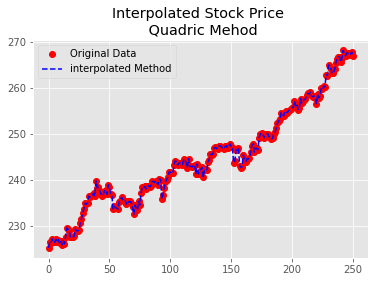

In [5]:
pylab.plot(figsize = (10,8))
pylab.plot(x,y, 'ro', label = "Original Data")
pylab.plot(x,y1(x), 'b--', label = "interpolated Method")
pylab.title("Interpolated Stock Price \n Quadric Mehod")
pylab.legend(loc = 'best')
pylab.show()


## Linear Regression

In [6]:
from sklearn import svm
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
forecast_out = int(30)
df1['Prediction'] = df1['Close'].shift(-forecast_out)
print(df1)

                 Close  Prediction
Date                              
2017-01-03  225.240005  234.919998
2017-01-04  226.580002  234.720001
2017-01-05  226.399994  235.089996
2017-01-06  227.210007  236.490005
2017-01-09  226.460007  236.279999
...                ...         ...
2017-12-22  267.510010         NaN
2017-12-26  267.190002         NaN
2017-12-27  267.320007         NaN
2017-12-28  267.869995         NaN
2017-12-29  266.859985         NaN

[251 rows x 2 columns]


In [8]:
X = np.array(df1.drop(['Prediction'],1))
X = preprocessing.scale(X)
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

In [9]:
X.min()

-1.7816156668933252

In [10]:
X.max()

1.3198513253821023

In [11]:
y = np.array(df1['Prediction'])
y = y[:-forecast_out]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [13]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
testpredictions = clf.predict(X_test)
#Testing
confidence = clf.score(X_test,y_test)
print("confidence:", confidence)

confidence: 0.8478549990687585


In [14]:
from sklearn import metrics
print('R2 Score is: ', metrics.explained_variance_score(y_test, testpredictions))
print('Mean Squared Error is: ', metrics.mean_squared_error(y_test, testpredictions))
print('Root Mean Squared Error is: ', np.sqrt(metrics.mean_squared_error(y_test, testpredictions)))
print('Mean Absolute Error is: ', metrics.mean_absolute_error(y_test, testpredictions))
print('Mean Absolute Percentage Error is: ', metrics.mean_absolute_percentage_error(y_test, testpredictions))

R2 Score is:  0.8483375809271161
Mean Squared Error is:  16.136244828231437
Root Mean Squared Error is:  4.01699450189211
Mean Absolute Error is:  3.3833507106610723
Mean Absolute Percentage Error is:  0.013667567484174171


In [15]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[262.85210798 262.1184012  262.54317571 264.1746893  263.95266816
 264.53187935 264.40640323 266.95502084 266.8005547  269.02097228
 268.48998941 268.18108659 267.26395311 267.31221089 268.11350214
 269.50366791 270.27596913 270.7297042  270.70074364 269.6484707
 270.46905917 272.10057275 271.10622093 270.97105202 271.50200542
 271.43445043 271.12551815 271.25102373 271.78197714 270.80692254]


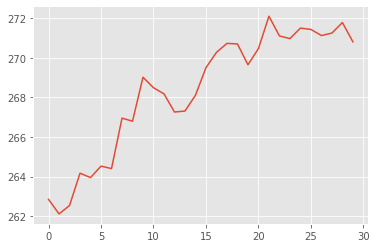

In [16]:
plt.plot(forecast_prediction)

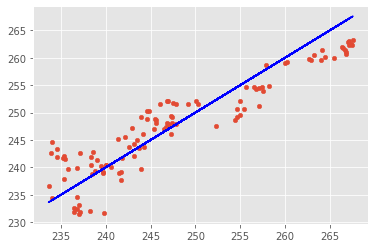

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_test, testpredictions,s=20)
plt.plot(y_test, y_test, 'b')

<AxesSubplot:ylabel='Density'>

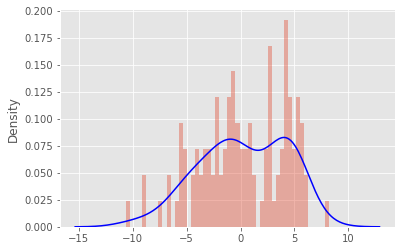

In [18]:
import seaborn as sns
sns.distplot(y_test-testpredictions, kde=True, kde_kws={'color':'b'}, bins=50)